In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import statistics
import random
from sklearn.utils import resample
from nltk.tokenize import sent_tokenize, word_tokenize

In [2]:
df_birth_year = pd.read_csv('data/birth_year.csv')
mil_and_genz = df_birth_year[(1986 < df_birth_year['birth_year']) & (df_birth_year['birth_year'] <= 2006)]
mil_and_genz['binary_birth_year'] = mil_and_genz['birth_year']
mil_and_genz.loc[(1986 < mil_and_genz['birth_year']) & (mil_and_genz['birth_year'] <= 1096), 'binary_birth_year'] = 1
mil_and_genz.loc[(1096 < mil_and_genz['birth_year']) & (mil_and_genz['birth_year'] <= 2006), 'binary_birth_year'] = 0
mil_and_genz = mil_and_genz.reset_index(drop=True)
documents = mil_and_genz['post']
mil_and_genz

<ipython-input-2-4a5280bb8c12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mil_and_genz['binary_birth_year'] = mil_and_genz['birth_year']
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,auhtor_ID,post,birth_year,binary_birth_year
0,t2_rnjzutp,Good on you for being responsible! I know self...,2001,0
1,t2_rnjzutp,"must go to the grocery store with their child,...",2001,0
2,t2_rnjzutp,"things on her videos, and YouTube took the vid...",2001,0
3,t2_rnjzutp,their app. There's also a program called SYNC ...,2001,0
4,t2_rnjzutp,"side. If the cops don't take your side, you'll...",2001,0
...,...,...,...,...
25450,t2_ef4dv976,clever political meme on a sub about political...,1989,0
25451,t2_7ps3a,Kevin. Glück gehabt. I will try! Thank you! I ...,1992,0
25452,t2_7ps3a,Handy/der Cloud speichern und in der Kamera ha...,1992,0
25453,t2_7ps3a,that. :)) On Google I cant find much informati...,1992,0


In [7]:
mil = df_birth_year[(1986 < df_birth_year['birth_year']) & (df_birth_year['birth_year'] <= 1996)]
genz = df_birth_year[(1996 < df_birth_year['birth_year']) & (df_birth_year['birth_year'] <= 2006)]
tokens_mil = mil.post.str.findall('\w+|[^\w\s]')
tokens_genz = genz.post.str.findall('\w+|[^\w\s]')
tokens_mil

17       [1890, -, something, ., The, exact, date, is, ...
18       [on, Saturday, ,, and, took, my, friend, and, ...
19       [read, my, card, with, their, useless, machine...
20       [recently, had, an, x, -, ray, that, showed, a...
21       [suggestions, for, offers, ,, and, negotiated,...
                               ...                        
41740    [clever, political, meme, on, a, sub, about, p...
41741    [Kevin, ., Glück, gehabt, ., I, will, try, !, ...
41742    [Handy, /, der, Cloud, speichern, und, in, der...
41743    [that, ., :, ), ), On, Google, I, cant, find, ...
41744    [Liste, eintragen, lassen, können, ,, sobald, ...
Name: post, Length: 15553, dtype: object

In [9]:
tokens_genz

0        [Good, on, you, for, being, responsible, !, I,...
1        [must, go, to, the, grocery, store, with, thei...
2        [things, on, her, videos, ,, and, YouTube, too...
3        [their, app, ., There, ', s, also, a, program,...
4        [side, ., If, the, cops, don, ', t, take, your...
                               ...                        
41716    [-, was, sent, it, for, free, ., *, In, 2008, ...
41717    [there, is, precident, ., I, haven, ', t, fini...
41718    [The, Next, Generation, /, Enterprise, 6, ., W...
41719    [episodes, from, Series, 8, -, 9, (, 23, ., 07...
41720    [of, the, week, here, ), ., *, World, Enough, ...
Name: post, Length: 9902, dtype: object

In [15]:
# vocabulary size
flat_tokens_m = [token.lower() for sublist in tokens_mil for token in sublist]
vocabulary_m = set(flat_tokens_m)
vocabulary_size_m = len(vocabulary_m)

flat_tokens_gz = [token.lower() for sublist in tokens_genz for token in sublist]
vocabulary_gz = set(flat_tokens_gz)
vocabulary_size_gz = len(vocabulary_gz)

t = df_birth_year.post.str.findall('\w+|[^\w\s]')
flat_tokens = [token.lower() for sublist in t for token in sublist]
vocabulary = set(flat_tokens)
vocabulary_size = len(vocabulary)

vocabulary_size_m, vocabulary_size_gz, vocabulary_size

(250785, 174009, 415908)

# Handling Imbalances

## Oversampling

In [5]:
genz_oversampled = resample(genz, replace=True, n_samples=len(mil), random_state=42)
tokens_genz_oversampled = genz_oversampled.post.str.findall('\w+|[^\w\s]')

## Undersampling

In [6]:
mil_undersampled = resample(mil, replace=False, n_samples=len(genz), random_state=42)
tokens_mil_undersampled = mil_undersampled.post.str.findall('\w+|[^\w\s]')

# Stylometry Distrubutions

In [78]:
def stylometry_comparison(corpus=0, task='Word', df_mil=0, df_genz=0):
    len_by_author_dict = {}
    if task == 'Sentence':
        gen1 = 'mil'
        gen2 = 'genz'
        lengths_mil = [len(nltk.sent_tokenize(text)) for text in df_mil['post']]
        lengths_genz = [len(nltk.sent_tokenize(text)) for text in df_genz['post']]
    else:
        generations = list(corpus.keys())
        gen1, gen2 = generations
        lengths_mil = [len(token) for token in corpus[gen1]]
        lengths_genz = [len(token) for token in corpus[gen2]]
    len_by_author_dict[gen1] = nltk.FreqDist(lengths_mil)
    len_by_author_dict[gen2] = nltk.FreqDist(lengths_genz)

    # extract the 15 highest token lengths for both generations
    highest_frequency = list((len_by_author_dict[gen1] + len_by_author_dict[gen2]).keys())[:15]
    df = pd.DataFrame({
        'Frequency': highest_frequency,
        gen1: [len_by_author_dict[gen1][token] for token in highest_frequency],
        gen2: [len_by_author_dict[gen2][token] for token in highest_frequency]
    })
    # sort the DataFrame by the frequencies
    df = df.sort_values(by=['Frequency'], ascending=True)

    plt.figure(figsize=(10, 6))
    plt.plot(df['Frequency'], df[gen1], label=gen1)
    plt.plot(df['Frequency'], df[gen2], label=gen2)
    plt.xlabel(f'{task} length')
    plt.ylabel('Frequency')
    plt.title(f'Comparison of 15 highest frequencies of {task} length')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
    return len_by_author_dict

## Tokens

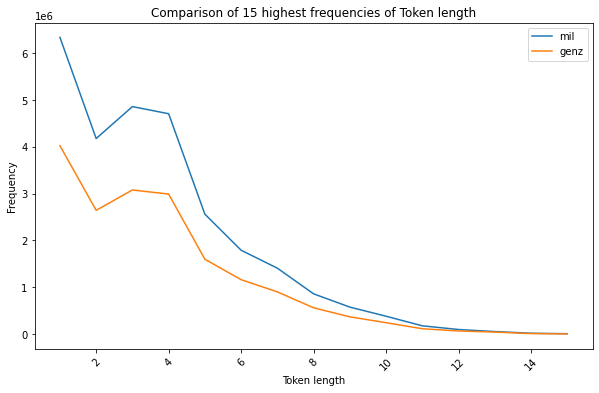

In [8]:
# transform the generation' corpora into lists of tokens
generational_tokens = {}
generational_tokens['mil'] = [token.lower() for token_list in tokens_mil for token in token_list]
generational_tokens['genz'] = [token.lower() for token_list in tokens_genz for token in token_list]

token_dict = stylometry_comparison(generational_tokens, 'Token')

In [9]:
# average token length:
average_mil = sum(key * value for key, value in token_dict['mil'].items()) / sum(token_dict['mil'].values())
average_genz = sum(key * value for key, value in token_dict['genz'].items()) / sum(token_dict['genz'].values())
average_mil, average_genz

(3.629755115943823, 3.6491408054355414)

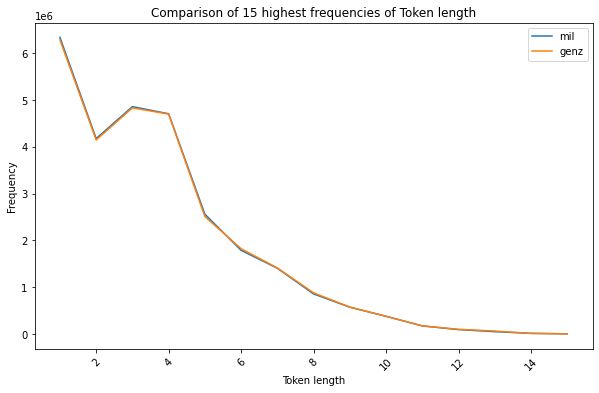

In [12]:
# oversampled
generational_tokens_os = {}
generational_tokens_os['mil'] = [token.lower() for token_list in tokens_mil for token in token_list]
generational_tokens_os['genz'] = [token.lower() for token_list in tokens_genz_oversampled for token in token_list]

token_dict_oversampled = stylometry_comparison(generational_tokens_os, 'Token')

In [13]:
average_mil_os = sum(key * value for key, value in token_dict_oversampled['mil'].items()) / sum(token_dict_oversampled['mil'].values())
average_genz_os = sum(key * value for key, value in token_dict_oversampled['genz'].items()) / sum(token_dict_oversampled['genz'].values())
average_mil_os, average_genz_os

(3.629755115943823, 3.652655169744062)

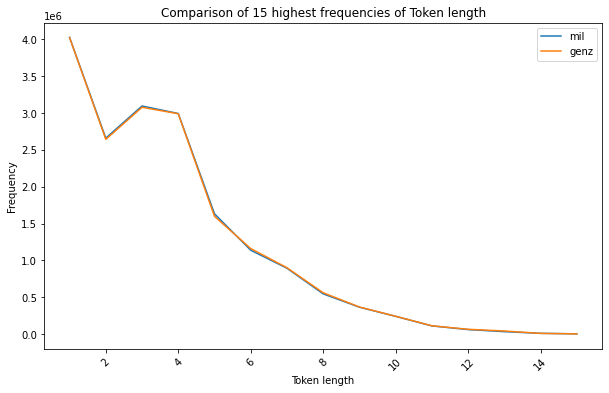

In [14]:
# undersampled
generational_tokens_us = {}
generational_tokens_us['mil'] = [token.lower() for token_list in tokens_mil_undersampled for token in token_list]
generational_tokens_us['genz'] = [token.lower() for token_list in tokens_genz for token in token_list]

token_dict_undersampled = stylometry_comparison(generational_tokens_us, 'Token')

In [15]:
average_mil_us = sum(key * value for key, value in token_dict_undersampled['mil'].items()) / sum(token_dict_undersampled['mil'].values())
average_genz_us = sum(key * value for key, value in token_dict_undersampled['genz'].items()) / sum(token_dict_undersampled['genz'].values())
average_mil_us, average_genz_us

(3.6293599814627955, 3.6491408054355414)

## Words

In [19]:
# transform the generation' corpora into lists of word tokens
generational_words = {}
generational_words['mil'] = [token.lower() for token_list in tokens_mil for token in token_list if token.isalpha()]
generational_words['genz'] = [token.lower() for token_list in tokens_genz for token in token_list if token.isalpha()]

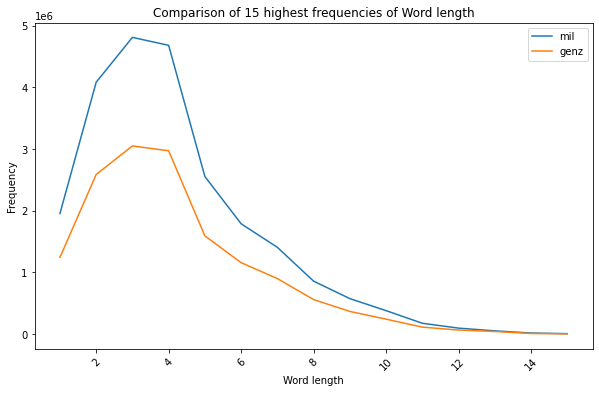

In [20]:
word_dict = stylometry_comparison(generational_words, 'Word')

In [22]:
# average word length:
agv_word_length_mil = sum(key * value for key, value in word_dict['mil'].items()) / sum(word_dict['mil'].values())
agv_word_length_genz = sum(key * value for key, value in word_dict['genz'].items()) / sum(word_dict['genz'].values())
agv_word_length_mil, agv_word_length_genz

(4.126666976061063, 4.1426668567068825)

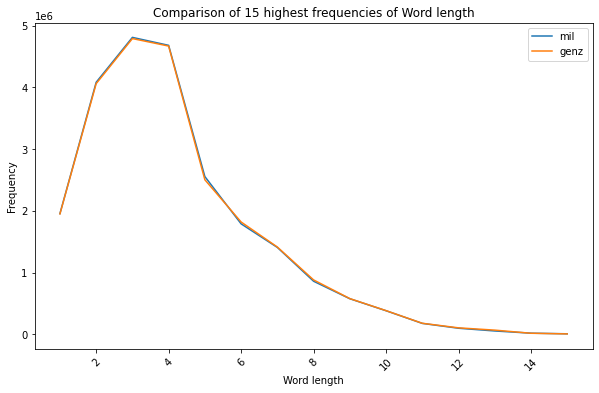

(4.126666976061063, 4.143268453251743)

In [24]:
# oversampled
generational_words_os = {}
generational_words_os['mil'] = [token.lower() for token_list in tokens_mil for token in token_list if token.isalpha()]
generational_words_os['genz'] = [token.lower() for token_list in tokens_genz_oversampled for token in token_list if token.isalpha()]

word_dict_oversampled = stylometry_comparison(generational_words_os, 'Word')

agv_word_length_mil_os = sum(key * value for key, value in word_dict_oversampled['mil'].items()) / sum(word_dict_oversampled['mil'].values())
agv_word_length_genz_os = sum(key * value for key, value in word_dict_oversampled['genz'].items()) / sum(word_dict_oversampled['genz'].values())
agv_word_length_mil_os, agv_word_length_genz_os

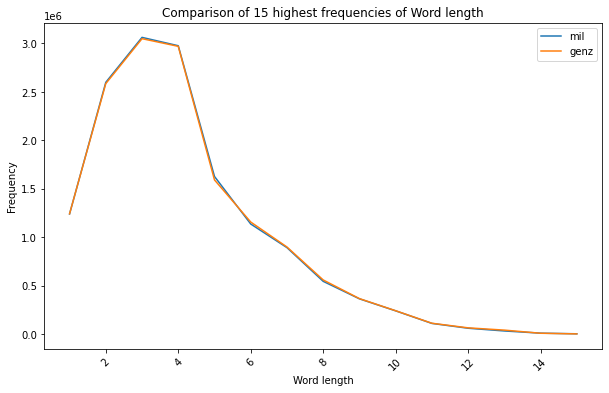

(4.125519455152242, 4.1426668567068825)

In [25]:
# undersampled
generational_words_us = {}
generational_words_us['mil'] = [token.lower() for token_list in tokens_mil_undersampled for token in token_list if token.isalpha()]
generational_words_us['genz'] = [token.lower() for token_list in tokens_genz for token in token_list if token.isalpha()]

word_dict_undersampled = stylometry_comparison(generational_words_us, 'Word')

agv_word_length_mil_us = sum(key * value for key, value in word_dict_undersampled['mil'].items()) / sum(word_dict_undersampled['mil'].values())
agv_word_length_genz_us = sum(key * value for key, value in word_dict_undersampled['genz'].items()) / sum(word_dict_undersampled['genz'].values())
agv_word_length_mil_us, agv_word_length_genz_us

## Document length

In [28]:
generational_token_sentence = {}

# gets all tokens of the whole reddit in one list
generational_token_sentence['mil'] = []
for token_list in tokens_mil:
    word_sentence = []
    for token in token_list:
        if token.isalpha():
            word_sentence.append(token)
    generational_token_sentence['mil'].append(word_sentence)

generational_token_sentence['genz'] = []
for token_list in tokens_genz:
    word_sentence = []
    for token in token_list:
        if token.isalpha():
            word_sentence.append(token)
    generational_token_sentence['genz'].append(word_sentence)

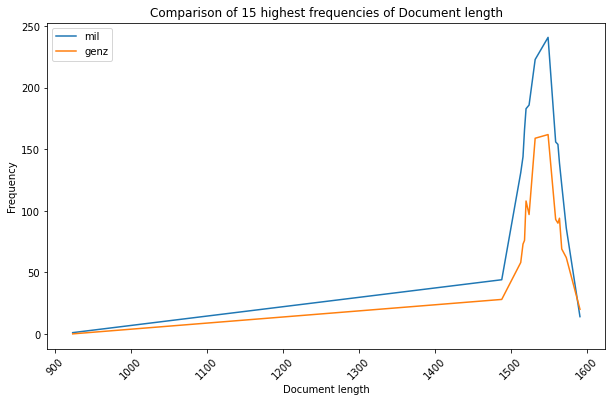

In [29]:
docu_dict = stylometry_comparison(generational_token_sentence, 'Document')

In [30]:
# average document length:
agv_docu_length_mil = sum(key * value for key, value in docu_dict['mil'].items()) / sum(docu_dict['mil'].values())
agv_docu_length_genz = sum(key * value for key, value in docu_dict['genz'].items()) / sum(docu_dict['genz'].values())
agv_docu_length_mil, agv_docu_length_genz

(1507.3392914550247, 1505.6680468592203)

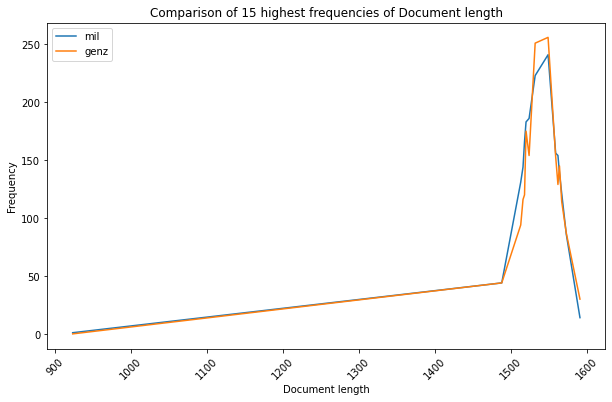

(1507.3392914550247, 1505.434128463962)

In [31]:
# oversampled
generational_token_sentence_os = {}
generational_token_sentence_os['mil'] = []
for token_list in tokens_mil:
    word_sentence = []
    for token in token_list:
        if token.isalpha():
            word_sentence.append(token)
    generational_token_sentence_os['mil'].append(word_sentence)
generational_token_sentence_os['genz'] = []
for token_list in tokens_genz_oversampled:
    word_sentence = []
    for token in token_list:
        if token.isalpha():
            word_sentence.append(token)
    generational_token_sentence_os['genz'].append(word_sentence)

docu_dict_os = stylometry_comparison(generational_token_sentence_os, 'Document')

agv_docu_length_mil_os = sum(key * value for key, value in docu_dict_os['mil'].items()) / sum(docu_dict_os['mil'].values())
agv_docu_length_genz_os = sum(key * value for key, value in docu_dict_os['genz'].items()) / sum(docu_dict_os['genz'].values())
agv_docu_length_mil_os, agv_docu_length_genz_os

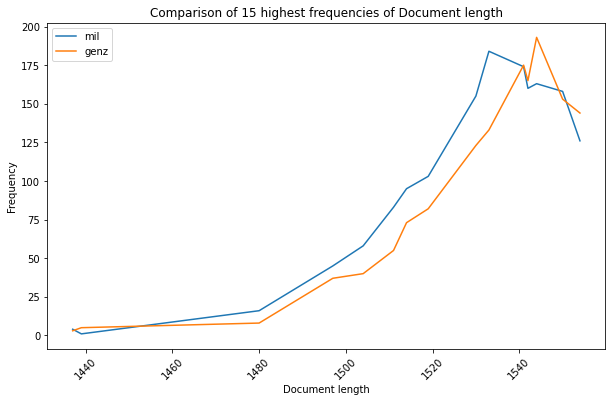

(1506.6164411230054, 1505.6680468592203)

In [32]:
# undersampled
generational_token_sentence_us = {}
generational_token_sentence_us['mil'] = []
for token_list in tokens_mil_undersampled:
    word_sentence = []
    for token in token_list:
        if token.isalpha():
            word_sentence.append(token)
    generational_token_sentence_us['mil'].append(word_sentence)
generational_token_sentence_us['genz'] = []
for token_list in tokens_genz:
    word_sentence = []
    for token in token_list:
        if token.isalpha():
            word_sentence.append(token)
    generational_token_sentence_us['genz'].append(word_sentence)

docu_dict_us = stylometry_comparison(generational_token_sentence_us, 'Document')

agv_docu_length_mil_us = sum(key * value for key, value in docu_dict_us['mil'].items()) / sum(docu_dict_us['mil'].values())
agv_docu_length_genz_us = sum(key * value for key, value in docu_dict_us['genz'].items()) / sum(docu_dict_us['genz'].values())
agv_docu_length_mil_us, agv_docu_length_genz_us

## Number of sentences

In [33]:
mil = df_birth_year[(1986 < df_birth_year['birth_year']) & (df_birth_year['birth_year'] <= 1996)]
genz = df_birth_year[(1996 < df_birth_year['birth_year']) & (df_birth_year['birth_year'] <= 2006)]

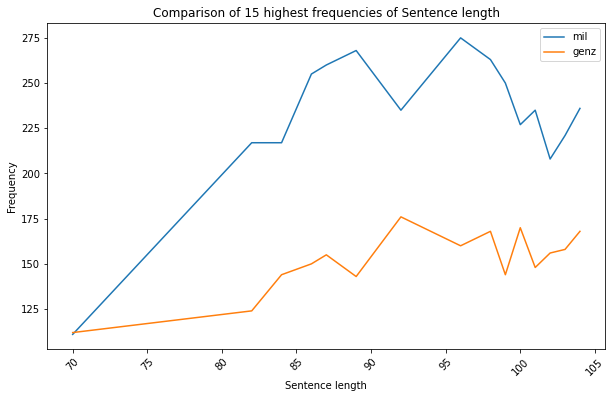

In [80]:
sent_dict = stylometry_comparison(0,'Sentence', mil, genz)

In [81]:
# average number of sentences:
avg_nr_sent_mil = sum(length * freq for length, freq in sent_dict['mil'].items()) / sum(sent_dict['mil'].values())
avg_nr_sent_genz = sum(length * freq for length, freq in sent_dict['genz'].items()) / sum(sent_dict['genz'].values())
avg_nr_sent_mil, avg_nr_sent_genz

(97.15900469362823, 91.8115532215714)

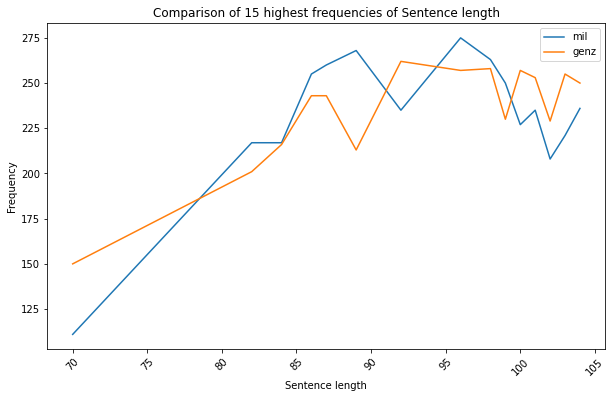

(97.15900469362823, 91.70770912364173)

In [82]:
# oversampled
sent_dict_os = stylometry_comparison(0,'Sentence', mil, genz_oversampled)
avg_nr_sent_mil_os = sum(length * freq for length, freq in sent_dict_os['mil'].items()) / sum(sent_dict_os['mil'].values())
avg_nr_sent_genz_os = sum(length * freq for length, freq in sent_dict_os['genz'].items()) / sum(sent_dict_os['genz'].values())
avg_nr_sent_mil_os, avg_nr_sent_genz_os

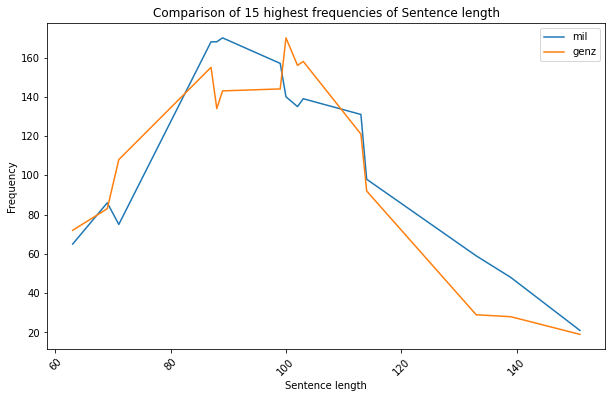

(97.09109270854373, 91.8115532215714)

In [83]:
# undersampled
sent_dict_us = stylometry_comparison(0,'Sentence', mil_undersampled, genz)
avg_nr_sent_mil_us = sum(length * freq for length, freq in sent_dict_us['mil'].items()) / sum(sent_dict_us['mil'].values())
avg_nr_sent_genz_us = sum(length * freq for length, freq in sent_dict_us['genz'].items()) / sum(sent_dict_us['genz'].values())
avg_nr_sent_mil_us, avg_nr_sent_genz_us

## Average sentence length per document

In [89]:
def sent_len_comparison(task='Word', df_mil=0, df_genz=0):
    len_by_author_dict = {}
    gen1 = 'mil'
    gen2 = 'genz'
    lengths_mil = df_mil['post'].apply(lambda text: round(sum(1 for sentence in sent_tokenize(text) for word in word_tokenize(sentence) if word.isalpha()) / max(1, len(sent_tokenize(text))),0))
    lengths_genz = df_genz['post'].apply(lambda text: round(sum(1 for sentence in sent_tokenize(text) for word in word_tokenize(sentence) if word.isalpha()) / max(1, len(sent_tokenize(text))),0))
    len_by_author_dict[gen1] = nltk.FreqDist(lengths_mil)
    len_by_author_dict[gen2] = nltk.FreqDist(lengths_genz)

    # extract the 15 highest token lengths for both generations
    highest_frequency = list((len_by_author_dict[gen1] + len_by_author_dict[gen2]).keys())[:15]
    df = pd.DataFrame({
        'Frequency': highest_frequency,
        gen1: [len_by_author_dict[gen1][token] for token in highest_frequency],
        gen2: [len_by_author_dict[gen2][token] for token in highest_frequency]
    })
    # sort the DataFrame by the frequencies
    df = df.sort_values(by=['Frequency'], ascending=True)

    plt.figure(figsize=(10, 6))
    plt.plot(df['Frequency'], df[gen1], label=gen1)
    plt.plot(df['Frequency'], df[gen2], label=gen2)
    plt.xlabel(f'{task} length')
    plt.ylabel('Frequency')
    plt.title(f'Comparison of 15 highest frequencies of average {task} length')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
    return len_by_author_dict

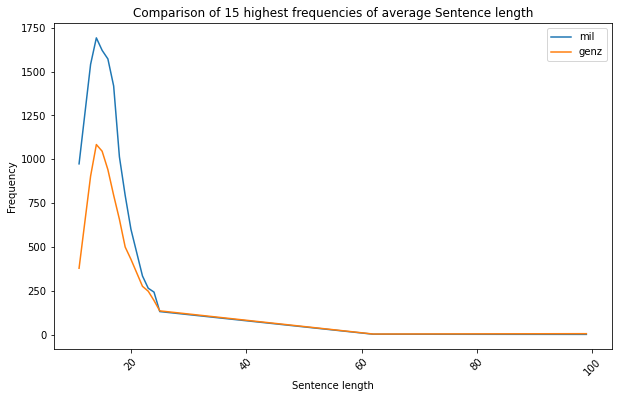

(16.268372661222916, 18.891739042617655)

In [90]:
sent_len_dict = sent_len_comparison('Sentence', mil, genz)

# average average sentence length:
avg_sent_len_mil = sum(length * freq for length, freq in sent_len_dict['mil'].items()) / sum(sent_len_dict['mil'].values())
avg_sent_len_genz = sum(length * freq for length, freq in sent_len_dict['genz'].items()) / sum(sent_len_dict['genz'].values())
avg_sent_len_mil, avg_sent_len_genz

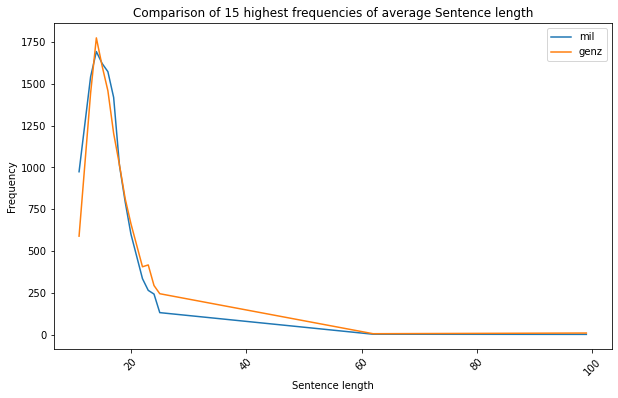

(16.268372661222916, 19.0296405838102)

In [91]:
# oversampled
sent_len_dict_os = sent_len_comparison('Sentence', mil, genz_oversampled)
avg_sent_len_mil_os = sum(length * freq for length, freq in sent_len_dict_os['mil'].items()) / sum(sent_len_dict_os['mil'].values())
avg_sent_len_genz_os = sum(length * freq for length, freq in sent_len_dict_os['genz'].items()) / sum(sent_len_dict_os['genz'].values())
avg_sent_len_mil_os, avg_sent_len_genz_os

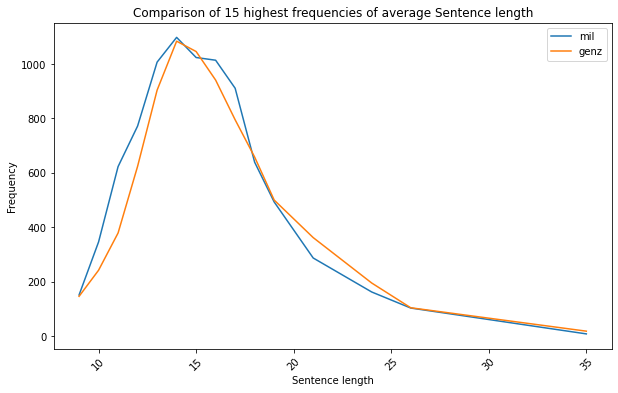

(16.278630579680872, 18.891739042617655)

In [92]:
# undersampled
sent_len_dict_us = sent_len_comparison('Sentence', mil_undersampled, genz)
avg_sent_len_mil_us = sum(length * freq for length, freq in sent_len_dict_us['mil'].items()) / sum(sent_len_dict_us['mil'].values())
avg_sent_len_genz_us = sum(length * freq for length, freq in sent_len_dict_us['genz'].items()) / sum(sent_len_dict_us['genz'].values())
avg_sent_len_mil_us, avg_sent_len_genz_us

## Stopwords

In [43]:
def stopwords_comparison(corpus):
    stopwords_by_author_dict = {}
    stop_words = set(stopwords.words('english'))
    generations = list(corpus.keys())
    gen1, gen2 = generations
    stopwords_gen1 = [word for word in corpus[gen1] if word in stop_words]
    stopwords_gen2 = [word for word in corpus[gen2] if word in stop_words]
    stopwords_by_author_dict[gen1] = nltk.FreqDist(stopwords_gen1)
    stopwords_by_author_dict[gen2] = nltk.FreqDist(stopwords_gen2)

    # Extract the 50 most common stopwords for both generations
    common_stopwords = list((stopwords_by_author_dict[gen1] + stopwords_by_author_dict[gen2]).keys())[:50]
    df = pd.DataFrame({
        'Stopword': common_stopwords,
        gen1: [stopwords_by_author_dict[gen1][word] for word in common_stopwords],
        gen2: [stopwords_by_author_dict[gen2][word] for word in common_stopwords]
    })
    # sort the DataFrame by the sum of frequencies in both generations
    df = df.sort_values(by=[gen1, gen2], ascending=False)

    plt.figure(figsize=(10, 6))
    plt.plot(df['Stopword'], df[gen1], label=gen1)
    plt.plot(df['Stopword'], df[gen2], label=gen2)
    plt.xlabel('Stopwords')
    plt.ylabel('Frequency')
    plt.title(f'Comparison of 50 Most Common Stopwords - {gen1} vs. {gen2}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
    return stopwords_by_author_dict

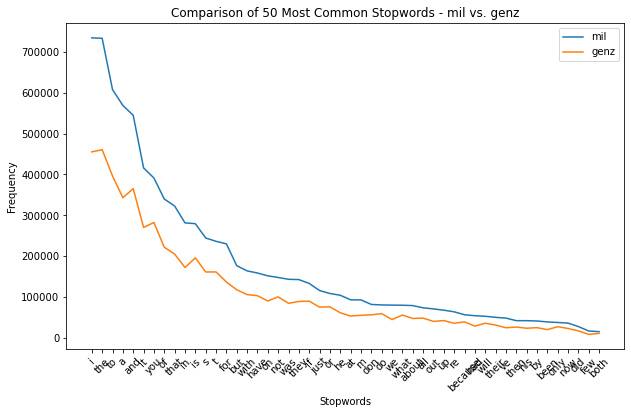

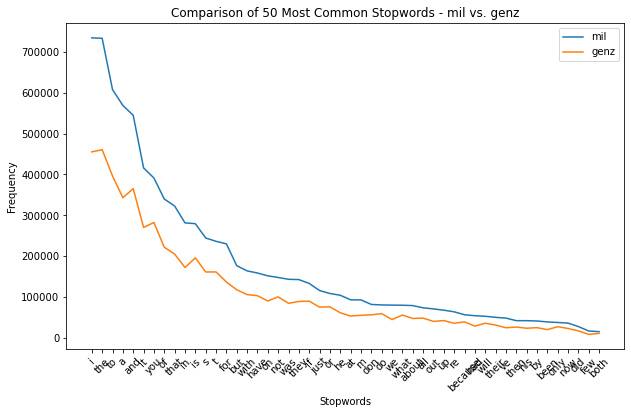

In [44]:
stopwords_dict = stopwords_comparison(generational_tokens)

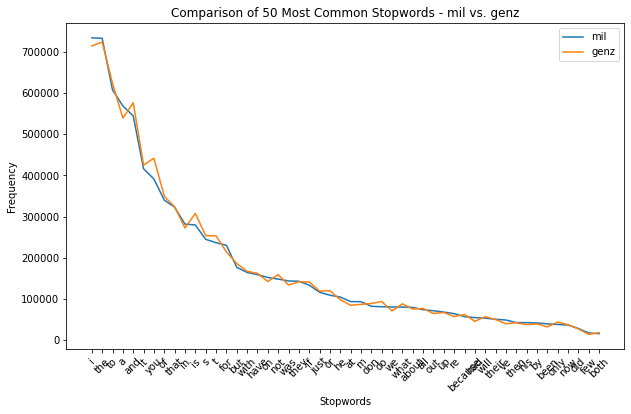

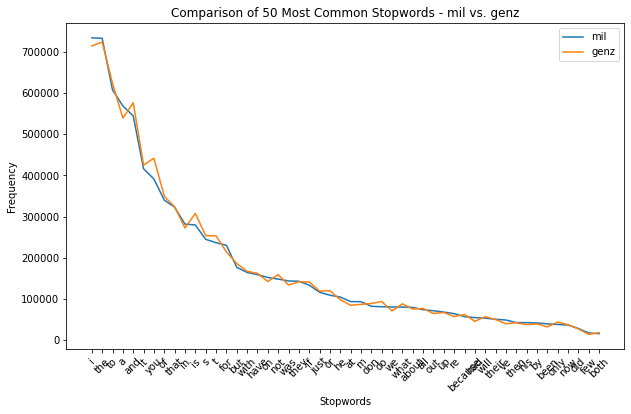

In [45]:
stopwords_dict_os = stopwords_comparison(generational_tokens_os)

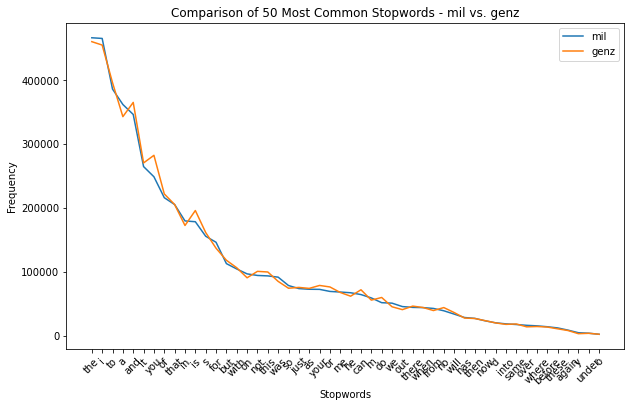

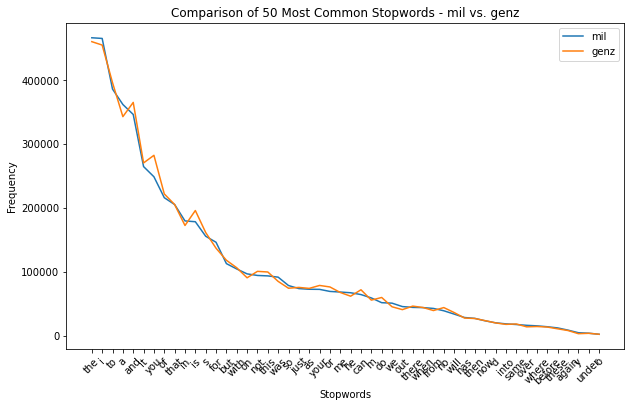

In [46]:
stopwords_dict_us = stopwords_comparison(generational_tokens_us)

# Punctuation

In [47]:
def punctuation_comparison(corpus):
    punctuation_by_author_dict = {}
    generations = list(corpus.keys())
    gen1, gen2 = generations
    punctuation_gen1 = [word for word in corpus[gen1] if word in string.punctuation]
    punctuation_gen2 = [word for word in corpus[gen2] if word in string.punctuation]
    punctuation_by_author_dict[gen1] = nltk.FreqDist(punctuation_gen1)
    punctuation_by_author_dict[gen2] = nltk.FreqDist(punctuation_gen2)

    # Extract the 50 most common punctuation for both generations
    common_stopwords = list((punctuation_by_author_dict[gen1] + punctuation_by_author_dict[gen2]).keys())[:50]
    df = pd.DataFrame({
        'Stopword': common_stopwords,
        gen1: [punctuation_by_author_dict[gen1][word] for word in common_stopwords],
        gen2: [punctuation_by_author_dict[gen2][word] for word in common_stopwords]
    })
    # sort the DataFrame by the sum of frequencies in both generations
    df = df.sort_values(by=[gen1, gen2], ascending=False)

    plt.figure(figsize=(10, 6))
    plt.plot(df['Stopword'], df[gen1], label=gen1)
    plt.plot(df['Stopword'], df[gen2], label=gen2)
    plt.xlabel('Punctuation symbols')
    plt.ylabel('Frequency')
    plt.title(f'Comparison of 50 Most Common Punctuation symbols - {gen1} vs. {gen2}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
    return punctuation_by_author_dict

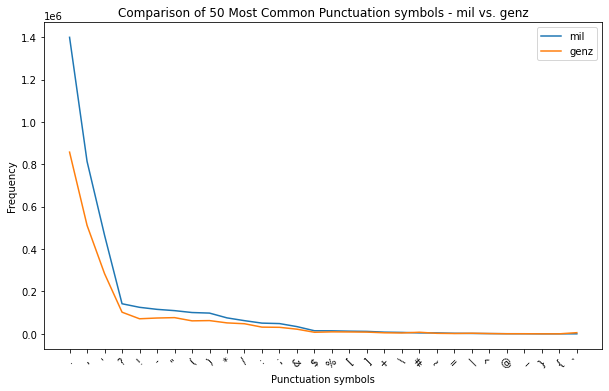

In [48]:
punc_dict = punctuation_comparison(generational_tokens)

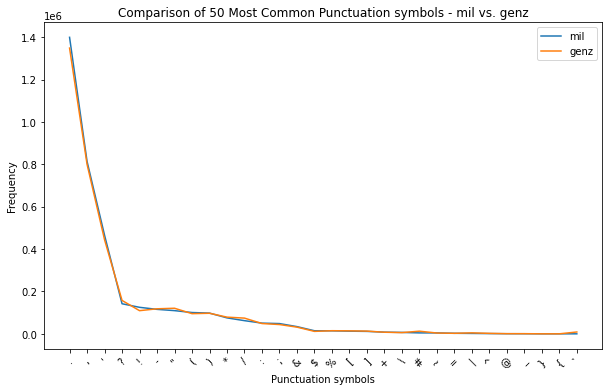

In [49]:
punc_dict_os = punctuation_comparison(generational_tokens_os)

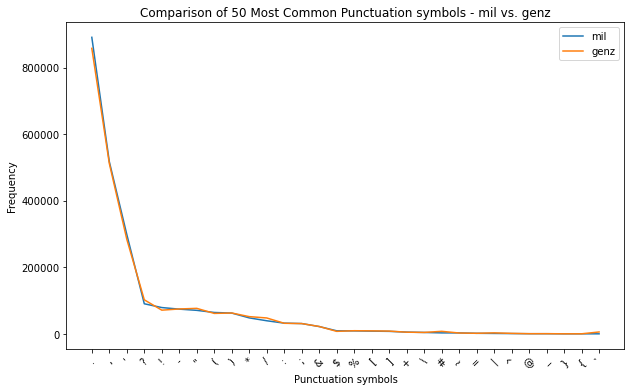

In [50]:
punc_dict_us = punctuation_comparison(generational_tokens_us)

# POS

In [51]:
def parts_of_speech_comparison(corpus):
    pos_by_author_dict = {}
    generations = list(corpus.keys())
    gen1, gen2 = generations
    punctuation_gen1 = [pos[1] for pos in nltk.pos_tag(corpus[gen1])]
    punctuation_gen2 = [pos[1] for pos in nltk.pos_tag(corpus[gen2])]
    pos_by_author_dict[gen1] = nltk.FreqDist(punctuation_gen1)
    pos_by_author_dict[gen2] = nltk.FreqDist(punctuation_gen2)

    # Extract the POSses for both generations
    common_stopwords = list((pos_by_author_dict[gen1] + pos_by_author_dict[gen2]).keys())
    df = pd.DataFrame({
        'Stopword': common_stopwords,
        gen1: [pos_by_author_dict[gen1][word] for word in common_stopwords],
        gen2: [pos_by_author_dict[gen2][word] for word in common_stopwords]
    })
    # sort the DataFrame by the sum of frequencies in both generations
    df = df.sort_values(by=[gen1, gen2], ascending=False)

    plt.figure(figsize=(10, 6))
    plt.plot(df['Stopword'], df[gen1], label=gen1)
    plt.plot(df['Stopword'], df[gen2], label=gen2)
    plt.xlabel('POS tags')
    plt.ylabel('Frequency')
    plt.title(f'Comparison of POS tags - {gen1} vs. {gen2}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
    return pos_by_author_dict

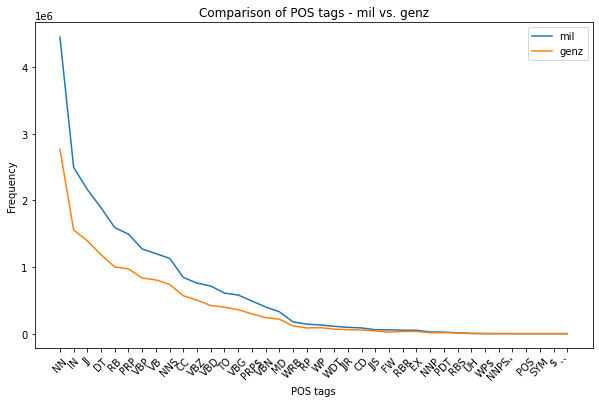

In [52]:
pos_dict = parts_of_speech_comparison(generational_words)

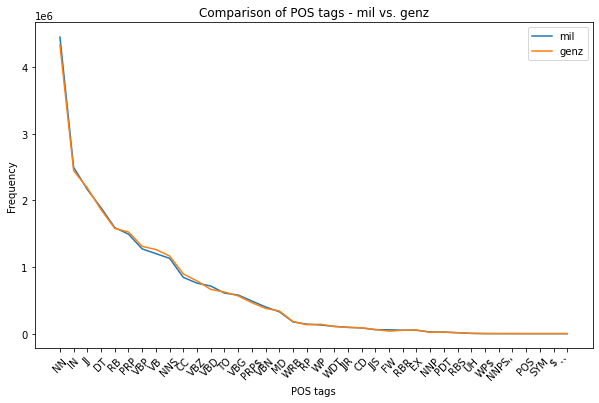

In [53]:
pos_dict_os = parts_of_speech_comparison(generational_words_os)

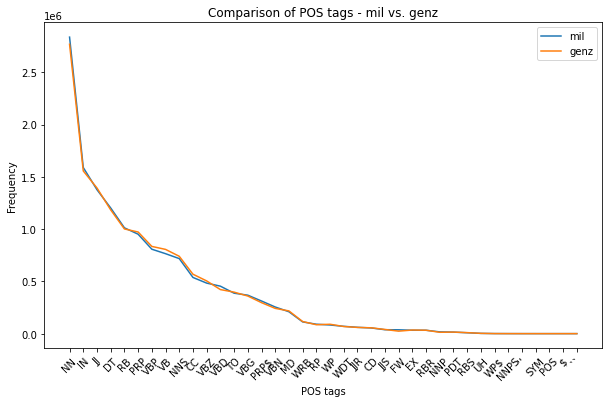

In [54]:
pos_dict_us = parts_of_speech_comparison(generational_words_us)